In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
len(X_train)

60000

In [7]:
len(y_train)

60000

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

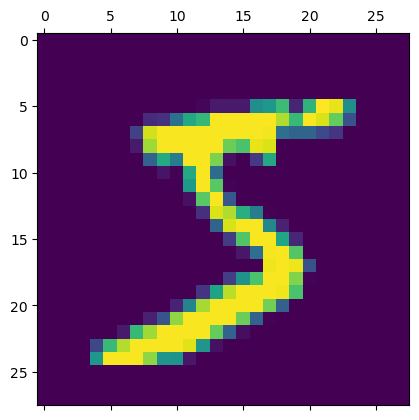

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

In [11]:
X_train = X_train / 255
X_test = X_test / 255


In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

/Users/sirisha/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 376us/step - accuracy: 0.8098 - loss: 0.7220
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 360us/step - accuracy: 0.9122 - loss: 0.3122
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 366us/step - accuracy: 0.9217 - loss: 0.2853
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 366us/step - accuracy: 0.9241 - loss: 0.2729
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step - accuracy: 0.9278 - loss: 0.2633


In [14]:
model.evaluate(X_test_flattened ,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.9145 - loss: 0.3035


[0.26727721095085144, 0.9254999756813049]

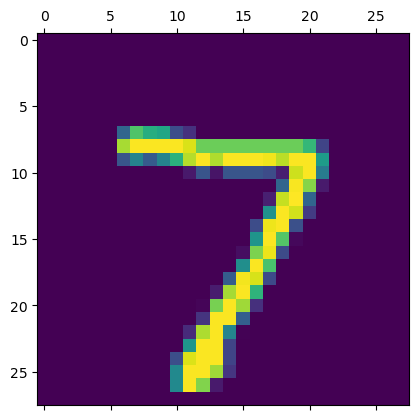

In [15]:
plt.matshow(X_test[0])

In [24]:
y_test_predict=model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step


In [25]:
y_test_predict[0]

array([4.04268689e-02, 4.88195838e-07, 7.70622566e-02, 9.63769078e-01,
       2.57956493e-03, 1.19027734e-01, 2.33499873e-06, 9.99733865e-01,
       1.02055885e-01, 6.74309790e-01], dtype=float32)

In [26]:
np.argmax(y_test_predict[0])

7

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_test_predict]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1115,    2,    2,    0,    1,    4,    2,    9,    0],
       [   7,    8,  928,   14,    8,    3,   13,   10,   37,    4],
       [   4,    0,   19,  924,    0,   17,    3,   11,   25,    7],
       [   1,    1,    5,    1,  919,    0,   14,    4,   11,   26],
       [  12,    2,    4,   38,    9,  759,   23,    6,   32,    7],
       [  11,    3,    5,    1,    7,    7,  920,    2,    2,    0],
       [   1,    5,   24,    6,    7,    1,    0,  946,    4,   34],
       [   7,    8,    7,   21,    8,   20,   12,   12,  873,    6],
       [  11,    7,    1,   10,   34,    6,    0,   24,    8,  908]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

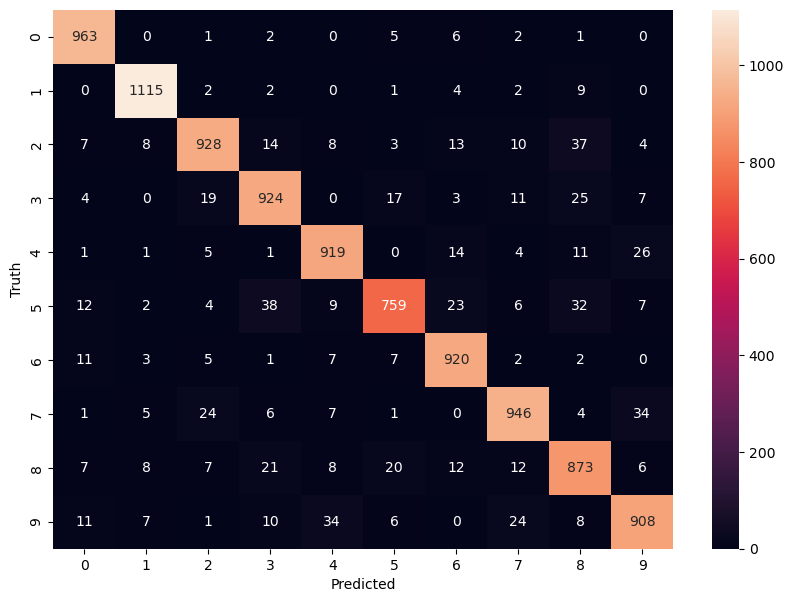

In [30]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8498 - loss: 0.5931
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.9425 - loss: 0.1983
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.9604 - loss: 0.1366
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 990us/step - accuracy: 0.9705 - loss: 0.1028
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9788 - loss: 0.0755


In [34]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.9678 - loss: 0.1015


[0.09071167558431625, 0.9717000126838684]

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8)

/Users/sirisha/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8455 - loss: 0.6145
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9423 - loss: 0.1999
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9615 - loss: 0.1357
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9706 - loss: 0.0994
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9777 - loss: 0.0797
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9835 - loss: 0.0573
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9869 - loss: 0.0470
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9904 - loss: 0.0374
